# ML-MINOR-FEB-ML2B1-Amitanshu Sahoo

# DATA CLEANING  

Data Cleaning refers to extracting the usefull parts of the data from a given dataset .We have been given dataset of game apps in the AppStore .We need to see the past data to show the best combination of strategy games based on the user rating which would be 4 or above.

In [1]:
#importing the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics as st

In [2]:
#obtaining the dataset
appgames = pd.read_csv('/home/amitanshu/Documents/computer science/Verzeo Internship/appstore_games.csv')

In [3]:
#View of the first 10 elements of the original data
appgames.head(10)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


### Removing unnecessary Series Data (Columns) from the DataFrame

We see from the above DataFrame that certain columns do not provide any usefull insight into the data for analysis.Hence it is important to get rid of those columns in the first place.

1.The url and icon url column has no significance as it is not at all a feature which a customer wants to look at while buying an app.

2.ID of the app is also a feature which has no relation with the customer and hence the rating.

3.A lot of rows do not contain subtitle data hence the subtitile column has to be removed. As it is a text based row there can be no substitute for the same.

4.Description data is a text based data and is not required for the preliminary data analysis .Hence has to be removed.

5.Primary Genre column has same value for all the rows.Hence it has no contribution towards the analysis of customer response.

In [4]:
#Adding underscore to the column names so that dot operator can be used in the future
appgames.columns = appgames.columns.str.replace(' ','_')
appgames.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon_URL', 'Average_User_Rating',
       'User_Rating_Count', 'Price', 'In-app_Purchases', 'Description',
       'Developer', 'Age_Rating', 'Languages', 'Size', 'Primary_Genre',
       'Genres', 'Original_Release_Date', 'Current_Version_Release_Date'],
      dtype='object')

In [5]:
#Dropping the unusefull columns
appgames.drop(['URL','ID','Subtitle','Icon_URL','Description','Primary_Genre'],axis = 1, inplace = True)

In [6]:
appgames.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Developer,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date
0,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,OutOfTheBit Ltd,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,Gravitation,2.5,35.0,0.00,NaN,Robert Farnum,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,Colony,2.5,125.0,0.99,NaN,Chris Haynes,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018
8,Carte,2.5,44.0,0.00,NaN,Jean-Francois Pautex,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,"""Barrels O' Fun""",2.5,184.0,0.00,NaN,BesqWare,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008


### Analysing the Developer Column

In [7]:
#Number of games each developer made 
appgames.Developer.value_counts().head(50)

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    123
Vikash Patel                                  107
Netsummit Marketing, Inc.                      95
GabySoft                                       85
NetSummit Enterprises, Inc.                    77
Andrew Kudrin                                  62
MmpApps Corp.                                  61
Domyung Kim                                    57
Amy Prizer                                     46
Detention Apps                                 42
Qumaron                                        41
HexWar Games Ltd                               39
Gulfam Asghar                                  38
Anthony Hindle                                 37
Tayga Games OOO                                37
Lazy Days, LLC                                 37
EASY Inc.                                      36
8Floor                                         36
M&M App Services Pty Ltd                       36
Renato Erive                                   35


In [8]:
appgames.Average_User_Rating.unique()

array([4. , 3.5, 3. , 2.5, nan, 2. , 4.5, 1.5, 5. , 1. ])

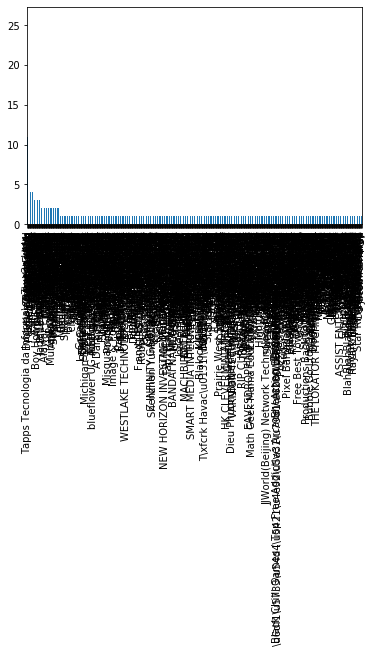

In [9]:
#Plotting a graph between the developers and the number of 5-star rating they got
DEV1 = appgames.Developer[appgames.Average_User_Rating == 5.].value_counts()
DEV1.plot(kind = 'bar')

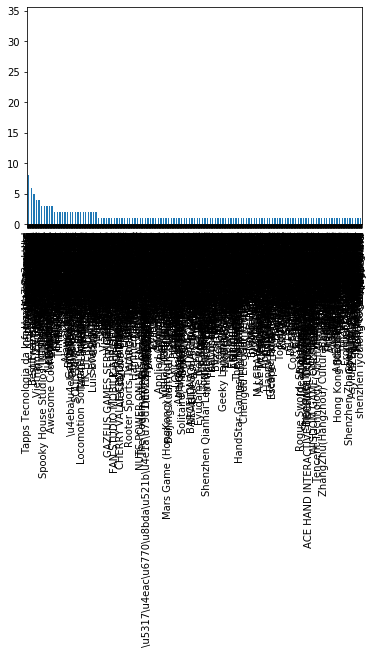

In [10]:
#Plotting a graph between the developers and the number of 4-star rating they got
DEV2 = appgames.Developer[appgames.Average_User_Rating == 4.].value_counts()
DEV2.plot(kind = 'bar') 

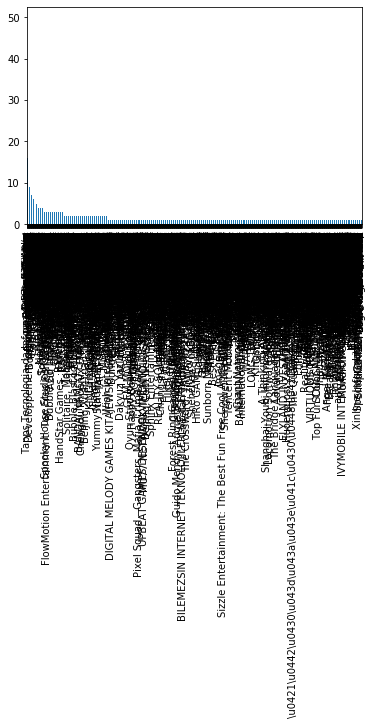

In [11]:
#Plotting a graph between the developers and the number of 4.5-star rating they got
DEV3 = appgames.Developer[appgames.Average_User_Rating == 4.5].value_counts()
DEV3.plot(kind = 'bar')

In [12]:
#Total number of unique Developers
appgames.Developer.nunique()

8693

From the above cells ,we see that the Average User Rating has a very weak dependence on the Developer . The big spikes at the beginning of the three graphs is seen because the 'Tapps Tecnologia da Informa\xe7\xe3o Ltda.' company has most number of games made in the app store (which is still very small looking at the total number of games being analysed).However, In general, as can bee seen in the plots, The number of 4 above rating that each developer has got is almost similar contributing very weakly to the user rating analysis.This also means that customers are giving good rating irrespective of the developer.

Hence there is no problem in dropping the developer column also.

In [13]:
#Dropping the developer column
appgames.drop(['Developer'],axis = 1, inplace = True)
appgames.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date
0,Sudoku,4.0,3553.0,2.99,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,Gravitation,2.5,35.0,0.00,NaN,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,Colony,2.5,125.0,0.99,NaN,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018
8,Carte,2.5,44.0,0.00,NaN,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,"""Barrels O' Fun""",2.5,184.0,0.00,NaN,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008


### Replacing NaN values in in-app-purchases with 0

In-app-purchases has a good amount of capacity in deciding whether the customer would continue to use the app or not and also the rating .Hence should not be removed from the analysis .However since many of the rows in this column have NaN value we replace them with 0 .

In [14]:
#Replacing with NaN value with 0 in the in-app-purchases column
appgames['In-app_Purchases'].fillna(value = 0, inplace = True)

In [15]:
#DataFrame now
appgames.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [16]:
#Checking the datatypes of the columns in the DataFrame 
appgames.dtypes

Name                             object
Average_User_Rating             float64
User_Rating_Count               float64
Price                           float64
In-app_Purchases                 object
Age_Rating                       object
Languages                        object
Size                            float64
Genres                           object
Original_Release_Date            object
Current_Version_Release_Date     object
dtype: object

### Analysis and Manipulation of Genre Data Series

Genre data series is important to analyse as it can give us an insight to what genre users want the most.

In [17]:
#Taking a copy of the partially cleaned DataFrame for further manipulation.
appgames_1 = appgames.copy()
appgames_1.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [18]:
#There are no NaN values in Genres column
appgames_1.Genres.isnull().value_counts()

False    17007
Name: Genres, dtype: int64

In [19]:
#Shape after partial cleaning
appgames_1.shape

(17007, 11)

In [20]:
#Counting the number of rows which have NaN values for average user rating
appgames_1.Average_User_Rating.isnull().value_counts()

True     9446
False    7561
Name: Average_User_Rating, dtype: int64

# ANALYSIS OF USER RATING VS GENRE

In order to find out meaningfull inference between Average User Ratings and Genre (also other properties such as price, date factor and age), 2 things have to be done as is clear from the above statements

1.We have to get rid of the rows which have NULL values for average user ratings.From the cell above, we see that if we do so we lose around 9446 K rows .However this is necessary step to get the correct inference between the properties.

2.The genre column needs to be split. 

### Removing NULL User Rating rows

In [21]:
#Getting rid of the rows containg NULL values for user rating and storing in a new DataFrame
appgames_2 = appgames_1.dropna(subset = ['Average_User_Rating'], how = 'any')

In [22]:
#Shape of the data frame that does not contain any null values for the User Rating column
appgames_2.shape

(7561, 11)

### Genre Split 

In [23]:
#Taking a look at the intricacies before split
#We see that there are 623 unique combinations in the data set.To analyse which combination is giving best user
#ratings we need to split the genre column and look at the number of unique genre available with us
appgames_2.Genres.nunique()

623

In [24]:
#We will carry out a column wise split for the purpose and append the resultant data frame 
#to the cleaned data frame.The genre split is NOT based on any hierarchy in the genre .It is merely a split of 
#different genres the games might belong to

Genre_Split = appgames_2.Genres.str.split(pat = ',',n = -1,expand = True)
col_names = ['Genre_1','Genre_2','Genre_3','Genre_4','Genre_5','Genre_6']
Genre_Split.columns = col_names
Genre_Split

,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6
0,Games,Strategy,Puzzle,None,None,None
1,Games,Strategy,Board,None,None,None
2,Games,Board,Strategy,None,None,None
3,Games,Strategy,Puzzle,None,None,None
4,Games,Strategy,Board,Education,None,None
...,...,...,...,...,...,...
16950,Games,Strategy,Entertainment,Puzzle,None,None
16956,Games,Entertainment,Action,Strategy,None,None
16962,Games,Simulation,Strategy,None,None,None
16967,Games,Simulation,Strategy,None,None,None


In [25]:
#now we append this data frame to the appgames_1 DataFrame and create a copy DataFame for further manipulation
appgames_3 = appgames_2.copy()
appgames_3[col_names] = Genre_Split
appgames_3.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,Games,Strategy,Puzzle,None,None,None
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018,Games,Strategy,Board,None,None,None
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017,Games,Board,Strategy,None,None,None
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,Games,Strategy,Puzzle,None,None,None
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,Games,Strategy,Board,Education,None,None
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,Games,Entertainment,Strategy,Puzzle,None,None
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,Games,Entertainment,Puzzle,Strategy,None,None
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018,Games,Strategy,Board,None,None,None
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017,Games,Strategy,Board,Entertainment,None,None
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008,Games,Casual,Strategy,None,None,None


In [26]:
#Removing NULL values from the Genre columns and replacing it with NA (Not Available) to prevent NULL values from making
#hindrance in further manipulations
appgames_3['Genre_1'].fillna(value = 'NA',inplace= True)
appgames_3['Genre_2'].fillna(value = 'NA',inplace= True)
appgames_3['Genre_3'].fillna(value = 'NA',inplace= True)
appgames_3['Genre_4'].fillna(value = 'NA',inplace= True)
appgames_3['Genre_5'].fillna(value = 'NA',inplace= True)
appgames_3['Genre_6'].fillna(value = 'NA',inplace= True)
appgames_3.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,Games,Strategy,Puzzle,NA,NA,NA
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018,Games,Strategy,Board,NA,NA,NA
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017,Games,Board,Strategy,NA,NA,NA
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,Games,Strategy,Puzzle,NA,NA,NA
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,Games,Strategy,Board,Education,NA,NA
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,Games,Entertainment,Strategy,Puzzle,NA,NA
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,Games,Entertainment,Puzzle,Strategy,NA,NA
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018,Games,Strategy,Board,NA,NA,NA
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017,Games,Strategy,Board,Entertainment,NA,NA
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008,Games,Casual,Strategy,NA,NA,NA


In [27]:
#Checking the shape of the DataFrame after all the updates
appgames_3.shape

(7561, 17)

In [28]:
#Checking the number of unique Genres in the data 
#For Genre_1 column
print(appgames_3.Genre_1.nunique())
appgames_3.Genre_1.value_counts()

21


Games                7291
Entertainment          92
Education              46
Utilities              44
Sports                 23
Reference              18
Finance                 8
Productivity            8
Books                   5
Lifestyle               4
Social Networking       3
Health & Fitness        3
Music                   3
Stickers                3
News                    2
Business                2
Medical                 2
Shopping                1
Travel                  1
Navigation              1
Food & Drink            1
Name: Genre_1, dtype: int64

In [29]:
#Checking the number of unique Genres in the data 
#For Genre_2 column
print(appgames_3.Genre_2.nunique())
appgames_3.Genre_2.value_counts()

35


 Strategy                  3186
 Entertainment             1192
 Simulation                 531
 Puzzle                     497
 Action                     404
 Board                      353
 Role Playing               326
 Casual                     213
 Adventure                  146
 Card                       141
 Games                      106
 Family                     102
 Education                   77
 Sports                      76
 Social Networking           30
 Trivia                      26
 Lifestyle                   24
 Racing                      21
 Word                        21
 Music                       16
 Travel                      14
 Utilities                   12
 Finance                      8
 Food & Drink                 6
 Casino                       6
 Health & Fitness             5
 Reference                    4
 Books                        4
 Business                     3
 Productivity                 3
 Photo & Video                2
 News   

In [30]:
#Checking the number of unique Genres in the data 
#For Genre_3 column
print(appgames_3.Genre_3.nunique())
appgames_3.Genre_3.value_counts()

37


 Strategy               2865
 Entertainment          1239
 Puzzle                  585
 Simulation              486
 Action                  430
 Board                   352
 Role Playing            324
NA                       216
 Casual                  216
 Card                    152
 Adventure               136
 Family                   99
 Games                    92
 Sports                   88
 Education                77
 Trivia                   26
 Lifestyle                22
 Music                    18
 Social Networking        18
 Word                     15
 Racing                   14
 Casino                   13
 Travel                   12
 Utilities                11
 Reference                11
 Food & Drink              9
 Finance                   6
 Business                  6
 Books                     4
 Productivity              4
 Photo & Video             4
 News                      3
 Gaming                    2
 Navigation                2
 Health & Fitn

In [31]:
#Checking the number of unique Genres in the data 
#For Genre_4 column
print(appgames_3.Genre_4.nunique())
appgames_3.Genre_4.value_counts()

35


NA                    3078
 Strategy             1509
 Entertainment        1202
 Puzzle                286
 Simulation            229
 Action                190
 Board                 152
 Role Playing          146
 Casual                 98
 Family                 97
 Education              80
 Adventure              76
 Sports                 74
 Card                   74
 Games                  70
 Lifestyle              31
 Trivia                 27
 Social Networking      25
 Racing                 15
 Utilities              15
 Music                  13
 Word                   12
 Travel                 10
 Food & Drink            9
 Reference               8
 Casino                  8
 Health & Fitness        5
 Photo & Video           4
 Finance                 4
 Business                4
 Books                   3
 Productivity            3
 News                    2
 Weather                 1
 Navigation              1
Name: Genre_4, dtype: int64

In [32]:
#Checking the number of unique Genres in the data 
#For Genre_5 column
print(appgames_3.Genre_5.nunique())
appgames_3.Genre_5.value_counts()

4


NA                      7558
 Games                     1
 Gaming                    1
 Emoji & Expressions       1
Name: Genre_5, dtype: int64

In [33]:
#Checking the number of unique Genres in the data 
#For Genre_6 column
print(appgames_3.Genre_6.nunique())
appgames_3.Genre_6.value_counts()

4


NA                7558
 Games               1
 Action              1
 Kids & Family       1
Name: Genre_6, dtype: int64

From the above analysis of unique Genres present in the columns we find that there are around 50 to 40 unique genres in the series'.There are certain analysis to be done here

1. Genre_5 and Genre_6 columns are of not much use as most of the them do not contain any values .

2. There are certain Genres which have really less apps (Eg.Productivity has only around 11 apps ).These Genres 
   are actually sub-genres and can be absorbed into the main genres . Below is given a manual analysis of grouping 
   certain Genres under a main genre.
   
3. An important thing we have ignored so far are the date factors (update date and release date) and the user        rating count factors. The user rating count strengthens the claim to an user rating .If more people rate an app    the Average user Rating will be closer to the population mean of the data.Else it will remain a sample mean.
   Therefore those rows which have user rating count less than 50 will be removed.App with update gap less than 3    months must be removed to prevent bias.
   
4. Genre_1 simply segregates games from the other types of apps .This segregation ,however is weak, as games
   also appear in other columns .

### Realease Date and Update Date Analysis

In [34]:
#Converting the string date into date_time type and finding the days difference between Release and Update date 
# and adding the series to the DataFrame
import datetime
appgames_3['Original_Release_Date'] = pd.to_datetime(appgames_3['Original_Release_Date'])
appgames_3['Current_Version_Release_Date'] = pd.to_datetime(appgames_3['Current_Version_Release_Date'])
appgames_3['Interval_of_Update'] = appgames_3.Current_Version_Release_Date - appgames_3.Original_Release_Date
appgames_3.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,Games,Strategy,Puzzle,NA,NA,NA,3126 days
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,Games,Strategy,Board,NA,NA,NA,3478 days
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,Games,Board,Strategy,NA,NA,NA,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,Games,Strategy,Puzzle,NA,NA,NA,3233 days
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,Games,Strategy,Board,Education,NA,NA,3656 days
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,Games,Entertainment,Strategy,Puzzle,NA,NA,3925 days
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",2008-07-30,2013-11-14,Games,Entertainment,Puzzle,Strategy,NA,NA,1933 days
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",2008-03-08,2018-03-10,Games,Strategy,Board,NA,NA,NA,3654 days
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",2008-03-08,2017-11-23,Games,Strategy,Board,Entertainment,NA,NA,3547 days
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",2008-01-08,2008-01-08,Games,Casual,Strategy,NA,NA,NA,0 days


In [35]:
#Checking the data types of the series'
appgames_3.dtypes

Name                                     object
Average_User_Rating                     float64
User_Rating_Count                       float64
Price                                   float64
In-app_Purchases                         object
Age_Rating                               object
Languages                                object
Size                                    float64
Genres                                   object
Original_Release_Date            datetime64[ns]
Current_Version_Release_Date     datetime64[ns]
Genre_1                                  object
Genre_2                                  object
Genre_3                                  object
Genre_4                                  object
Genre_5                                  object
Genre_6                                  object
Interval_of_Update              timedelta64[ns]
dtype: object

In [36]:
#There are 193 rows which have user rating counts less than 200
appgames_3.User_Rating_Count[appgames_3.User_Rating_Count < 200].value_counts()

5.0      390
6.0      330
7.0      266
8.0      255
10.0     170
        ... 
182.0      2
176.0      2
183.0      2
177.0      1
192.0      1
Name: User_Rating_Count, Length: 193, dtype: int64

In [37]:
#Rows that contain less than 90 days interval of update
appgames_3[appgames_3.Interval_of_Update < pd.to_timedelta(90, unit ='days')]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update
9,"""Barrels O' Fun""",2.5,184.0,0.0,0,4+,EN,1466515.0,"Games, Casual, Strategy",2008-01-08,2008-01-08,Games,Casual,Strategy,NA,NA,NA,0 days
14,Tetravex Lite,2.5,2358.0,0.0,0,4+,EN,731525.0,"Games, Puzzle, Strategy, Entertainment",2008-08-27,2008-10-21,Games,Puzzle,Strategy,Entertainment,NA,NA,55 days
25,Gaia Lite,3.5,1563.0,0.0,0,4+,EN,6550985.0,"Games, Strategy, Puzzle",2008-02-10,2008-02-10,Games,Strategy,Puzzle,NA,NA,NA,0 days
37,Checkers Online Lite,2.5,3521.0,0.0,0,4+,EN,9402423.0,"Games, Strategy, Board",2008-11-29,2008-11-29,Games,Strategy,Board,NA,NA,NA,0 days
51,Flip Ninja,2.5,6.0,0.0,0,4+,EN,1112393.0,"Games, Strategy, Puzzle",2009-01-16,2009-01-16,Games,Strategy,Puzzle,NA,NA,NA,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16950,Die Last,3.0,6.0,0.0,0,12+,"EN, ZH",151308288.0,"Games, Strategy, Entertainment, Puzzle",2019-07-31,2019-07-31,Games,Strategy,Entertainment,Puzzle,NA,NA,0 days
16956,Basic Slosh,5.0,30.0,0.0,0,4+,EN,79646720.0,"Games, Entertainment, Action, Strategy",2019-07-23,2019-07-23,Games,Entertainment,Action,Strategy,NA,NA,0 days
16962,Idle Racing Tycoon,5.0,51.0,0.0,0,9+,EN,125348864.0,"Games, Simulation, Strategy",2019-07-31,2019-07-31,Games,Simulation,Strategy,NA,NA,NA,0 days
16967,Glow Hockey Strike,5.0,5.0,0.0,0,4+,EN,128687104.0,"Games, Simulation, Strategy",2019-07-28,2019-07-28,Games,Simulation,Strategy,NA,NA,NA,0 days


In [38]:
appgames_3.shape

(7561, 18)

In [39]:
#To save Data Points we will consider only the intersection of the two above cases for dropping the rows
drop_rows = (appgames_3[appgames_3.User_Rating_Count < 50].index) &\
            (appgames_3[appgames_3.Interval_of_Update < pd.to_timedelta(90, unit ='days')].index)
appgames_3.drop(drop_rows,axis=0, inplace = True)
appgames_3.shape

(5813, 18)

In [40]:
#Checking the number of unique Genres in the data 
#For Genre_1 column
print(appgames_3.Genre_1.nunique())
appgames_3.Genre_1.value_counts()

20


Games                5586
Entertainment          74
Education              40
Utilities              39
Sports                 23
Reference              14
Finance                 8
Productivity            5
Books                   4
Social Networking       3
Health & Fitness        3
Lifestyle               3
Music                   2
Business                2
Medical                 2
Shopping                1
Travel                  1
News                    1
Navigation              1
Food & Drink            1
Name: Genre_1, dtype: int64

In [41]:
#Checking the number of unique Genres in the data 
#For Genre_2 column
print(appgames_3.Genre_2.nunique())
appgames_3.Genre_2.value_counts()

34


 Strategy                  2449
 Entertainment              930
 Simulation                 416
 Puzzle                     343
 Action                     311
 Role Playing               286
 Board                      285
 Casual                     132
 Card                       125
 Adventure                  111
 Games                       95
 Family                      66
 Education                   61
 Sports                      54
 Social Networking           22
 Lifestyle                   19
 Trivia                      17
 Word                        14
 Racing                      11
 Travel                      11
 Music                       10
 Utilities                    9
 Casino                       5
 Finance                      5
 Food & Drink                 5
 Health & Fitness             4
 Books                        4
 Reference                    3
 Photo & Video                2
 News                         2
 Business                     2
 Product

In [42]:
#Checking the number of unique Genres in the data 
#For Genre_3 column
print(appgames_3.Genre_3.nunique())
appgames_3.Genre_3.value_counts()

35


 Strategy             2176
 Entertainment         973
 Puzzle                432
 Simulation            391
 Action                336
 Board                 297
 Role Playing          269
 Casual                144
NA                     137
 Card                  136
 Adventure             108
 Games                  79
 Sports                 68
 Education              64
 Family                 63
 Trivia                 17
 Lifestyle              17
 Social Networking      15
 Word                   11
 Music                  10
 Travel                 10
 Reference               9
 Casino                  8
 Utilities               8
 Racing                  7
 Business                6
 Food & Drink            6
 Books                   3
 Photo & Video           3
 Finance                 3
 Productivity            2
 News                    2
 Medical                 1
 Navigation              1
 Health & Fitness        1
Name: Genre_3, dtype: int64

In [43]:
#Checking the number of unique Genres in the data 
#For Genre_4 column
print(appgames_3.Genre_4.nunique())
appgames_3.Genre_4.value_counts()

34


NA                    2307
 Strategy             1187
 Entertainment         916
 Puzzle                214
 Simulation            189
 Action                145
 Role Playing          130
 Board                 127
 Casual                 73
 Education              70
 Sports                 66
 Family                 66
 Card                   65
 Games                  53
 Adventure              49
 Trivia                 25
 Social Networking      23
 Lifestyle              23
 Utilities              11
 Music                  10
 Racing                 10
 Word                    9
 Travel                  9
 Food & Drink            7
 Reference               6
 Casino                  6
 Health & Fitness        4
 Business                3
 Photo & Video           2
 Books                   2
 Productivity            2
 Finance                 2
 Navigation              1
 News                    1
Name: Genre_4, dtype: int64

In [44]:
#Checking the number of unique Genres in the data 
#For Genre_5 column
print(appgames_3.Genre_5.nunique())
appgames_3.Genre_5.value_counts()

1


NA    5813
Name: Genre_5, dtype: int64

In [45]:
#Checking the number of unique Genres in the data 
#For Genre_6 column
print(appgames_3.Genre_5.nunique())
appgames_3.Genre_5.value_counts()

1


NA    5813
Name: Genre_5, dtype: int64

In [46]:
appgames_3.head()

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,Games,Strategy,Puzzle,NA,NA,NA,3126 days
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,Games,Strategy,Board,NA,NA,NA,3478 days
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,Games,Board,Strategy,NA,NA,NA,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,Games,Strategy,Puzzle,NA,NA,NA,3233 days
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,Games,Strategy,Board,Education,NA,NA,3656 days


### Grouping The Genres



In [47]:
#Checking out if a row contains games genre and does not contain strategy genre and vice versa
appgames_3.loc[(appgames_3.Genre_3.str.contains('Games') | appgames_3.Genre_4.str.contains('Games') | \
               appgames_3.Genre_1.str.contains('Games') |appgames_3.Genre_2.str.contains('Games')) \
               &(~appgames_3.Genre_2.str.contains('Strategy') & ~appgames_3.Genre_3.str.contains('Strategy') & \
                 ~appgames_3.Genre_4.str.contains('Strategy')) ]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update
16002,Idle Food Empire,4.5,66.0,0.0,0,4+,EN,73341952.0,"Games, Simulation, Casual",2019-01-02,2019-02-08,Games,Simulation,Casual,NA,NA,NA,37 days


In [48]:
#Checking out if a row contains strategy genre and does not contain game genre and vice versa
appgames_3.loc[(~appgames_3.Genre_3.str.contains('Games') & ~appgames_3.Genre_4.str.contains('Games') & \
               ~appgames_3.Genre_1.str.contains('Games') & ~appgames_3.Genre_2.str.contains('Games')) \
               &(appgames_3.Genre_2.str.contains('Strategy') | appgames_3.Genre_3.str.contains('Strategy') | \
                 appgames_3.Genre_4.str.contains('Strategy')) ]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update


From the above cells we see that there is only a single row which is a games row and is not a strategy row.
Hence we can convert all strings 'Games' into strategy without any loss of information.Equivalently I am just replacing the games genre by a NA notation, as it means the same as strategy . The single row which contains games genre but no strategy genre will be given strategy genre in place of game genre.

In [49]:
#Changing Games into Strategy for the single row mentioned above
appgames_3.loc[(appgames_3.Genre_3.str.contains('Games') | appgames_3.Genre_4.str.contains('Games') | \
               appgames_3.Genre_1.str.contains('Games') |appgames_3.Genre_2.str.contains('Games')) \
               &(~appgames_3.Genre_2.str.contains('Strategy') & ~appgames_3.Genre_3.str.contains('Strategy') & \
                 ~appgames_3.Genre_4.str.contains('Strategy')), 'Genre_1' ] = 'Strategy'

In [50]:
#Checking the number of unique Genres in the data after the manipulation
#For Genre_1 column
print(appgames_3.Genre_1.nunique())
appgames_3.Genre_1.value_counts()

21


Games                5585
Entertainment          74
Education              40
Utilities              39
Sports                 23
Reference              14
Finance                 8
Productivity            5
Books                   4
Social Networking       3
Health & Fitness        3
Lifestyle               3
Music                   2
Business                2
Medical                 2
Shopping                1
Travel                  1
News                    1
Navigation              1
Strategy                1
Food & Drink            1
Name: Genre_1, dtype: int64

In [51]:
#replacing all the games column by NA as all of them are strategy  Genre
appgames_3.loc[appgames_3['Genre_1'].str.contains('Games'),'Genre_1'] = 'NA'
appgames_3.loc[appgames_3['Genre_2'].str.contains('Games'),'Genre_2'] = 'NA'
appgames_3.loc[appgames_3['Genre_3'].str.contains('Games'),'Genre_3'] = 'NA'
appgames_3.loc[appgames_3['Genre_4'].str.contains('Games'),'Genre_4'] = 'NA'
appgames_3.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,NA,NA,3126 days
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,NA,Strategy,Board,NA,NA,NA,3478 days
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,NA,Board,Strategy,NA,NA,NA,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,NA,Strategy,Puzzle,NA,NA,NA,3233 days
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,NA,Strategy,Board,Education,NA,NA,3656 days
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,NA,Entertainment,Strategy,Puzzle,NA,NA,3925 days
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",2008-07-30,2013-11-14,NA,Entertainment,Puzzle,Strategy,NA,NA,1933 days
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",2008-03-08,2018-03-10,NA,Strategy,Board,NA,NA,NA,3654 days
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",2008-03-08,2017-11-23,NA,Strategy,Board,Entertainment,NA,NA,3547 days
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",2008-01-08,2008-01-08,NA,Casual,Strategy,NA,NA,NA,0 days


In [52]:
#replacing all the Entertainment column by NA as all of them are strategy genre
#and also because entertainment in itself does not provide much information
appgames_3.loc[appgames_3['Genre_1'].str.contains('Entertainment'),'Genre_1'] = 'NA'
appgames_3.loc[appgames_3['Genre_2'].str.contains('Entertainment'),'Genre_2'] = 'NA'
appgames_3.loc[appgames_3['Genre_3'].str.contains('Entertainment'),'Genre_3'] = 'NA'
appgames_3.loc[appgames_3['Genre_4'].str.contains('Entertainment'),'Genre_4'] = 'NA'
appgames_3.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Interval_of_Update
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,NA,NA,3126 days
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,NA,Strategy,Board,NA,NA,NA,3478 days
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,NA,Board,Strategy,NA,NA,NA,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,NA,Strategy,Puzzle,NA,NA,NA,3233 days
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,NA,Strategy,Board,Education,NA,NA,3656 days
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,NA,NA,Strategy,Puzzle,NA,NA,3925 days
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",2008-07-30,2013-11-14,NA,NA,Puzzle,Strategy,NA,NA,1933 days
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",2008-03-08,2018-03-10,NA,Strategy,Board,NA,NA,NA,3654 days
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",2008-03-08,2017-11-23,NA,Strategy,Board,NA,NA,NA,3547 days
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",2008-01-08,2008-01-08,NA,Casual,Strategy,NA,NA,NA,0 days


In [53]:
#Since Genre_5 and Genre_6 column are totally empty after complete data cleaning process.Hence we need to drop them
appgames_3.drop(['Genre_5','Genre_6'], axis=1, inplace=True)
appgames_3.head(10)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,3126 days
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,NA,Strategy,Board,NA,3478 days
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,NA,Board,Strategy,NA,3105 days
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,NA,Strategy,Puzzle,NA,3233 days
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,NA,Strategy,Board,Education,3656 days
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,NA,NA,Strategy,Puzzle,3925 days
6,Gravitation,2.5,35.0,0.00,0,4+,NaN,6328320.0,"Games, Entertainment, Puzzle, Strategy",2008-07-30,2013-11-14,NA,NA,Puzzle,Strategy,1933 days
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",2008-03-08,2018-03-10,NA,Strategy,Board,NA,3654 days
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",2008-03-08,2017-11-23,NA,Strategy,Board,NA,3547 days
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",2008-01-08,2008-01-08,NA,Casual,Strategy,NA,0 days


In [54]:
print('Genre_1\n',appgames_3.Genre_1.nunique(),'\n',appgames_3.Genre_1.value_counts(),'\n')
print('Genre_2\n',appgames_3.Genre_2.nunique(),'\n',appgames_3.Genre_2.value_counts(),'\n')
print('Genre_3\n',appgames_3.Genre_3.nunique(),'\n',appgames_3.Genre_3.value_counts(),'\n')
print('Genre_4\n',appgames_3.Genre_4.nunique(),'\n',appgames_3.Genre_4.value_counts(),'\n')

Genre_1
 20 
 NA                   5659
Education              40
Utilities              39
Sports                 23
Reference              14
Finance                 8
Productivity            5
Books                   4
Health & Fitness        3
Lifestyle               3
Social Networking       3
Music                   2
Business                2
Medical                 2
Shopping                1
Travel                  1
News                    1
Navigation              1
Strategy                1
Food & Drink            1
Name: Genre_1, dtype: int64 

Genre_2
 33 
  Strategy                  2449
NA                         1025
 Simulation                 416
 Puzzle                     343
 Action                     311
 Role Playing               286
 Board                      285
 Casual                     132
 Card                       125
 Adventure                  111
 Family                      66
 Education                   61
 Sports                      54
 Socia

In [55]:
appgames_3.loc[(appgames_3['Average_User_Rating'] == 5.0)|(appgames_3['Average_User_Rating'] == 4.5)|\
              (appgames_3['Average_User_Rating'] == 4.0)]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,3126 days
24,Boomshine,4.0,637.0,0.99,0,4+,EN,22873088.0,"Games, Puzzle, Entertainment, Strategy",2008-07-10,2017-05-20,NA,Puzzle,NA,Strategy,3236 days
26,Fieldrunners,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",9+,EN,75041792.0,"Games, Entertainment, Action, Strategy",2008-05-10,2018-11-04,NA,NA,Action,Strategy,3830 days
30,Expert Sudoku,4.0,523.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",9543680.0,"Games, Strategy, Entertainment, Puzzle",2008-10-21,2017-05-30,NA,Strategy,NA,Puzzle,3143 days
32,Chess Genius,4.0,156.0,5.99,0,4+,"EN, FR, DE, IT, ES",1751040.0,"Games, Strategy, Board, Entertainment",2008-08-11,2016-05-08,NA,Strategy,Board,NA,2827 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,Zoo Park Idle,4.0,10.0,0.00,0,12+,EN,89412608.0,"Games, Strategy",2019-06-28,2019-10-07,NA,Strategy,NA,NA,101 days
16863,Hero Chess: Teamfight Auto,4.5,51.0,0.00,9.99,9+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",198211584.0,"Games, Board, Strategy",2019-07-29,2019-07-29,NA,Board,Strategy,NA,0 days
16874,Idle Waterpark 3D Fun Aquapark,5.0,201.0,0.00,0,4+,EN,325653504.0,"Games, Entertainment, Simulation, Strategy",2019-02-08,2019-02-08,NA,NA,Simulation,Strategy,0 days
16883,Secret Run 3D - Touch the Spot,4.5,50.0,0.00,0,4+,EN,117440512.0,"Games, Racing, Strategy, Entertainment",2019-01-08,2019-01-08,NA,Racing,Strategy,NA,0 days


There are 4446 rows which have 4 and above rating .To get a very clear picture of Genres that produce best results the subgenres (Genres which have very little games in the app store) have to be assimilated into their main genres.


In [56]:
appgames_3.dtypes

Name                                     object
Average_User_Rating                     float64
User_Rating_Count                       float64
Price                                   float64
In-app_Purchases                         object
Age_Rating                               object
Languages                                object
Size                                    float64
Genres                                   object
Original_Release_Date            datetime64[ns]
Current_Version_Release_Date     datetime64[ns]
Genre_1                                  object
Genre_2                                  object
Genre_3                                  object
Genre_4                                  object
Interval_of_Update              timedelta64[ns]
dtype: object

In [57]:
#Checking if there is any row whose Genre is not available 
appgames_3.loc[appgames_3['Genre_1'].str.contains('NA') & appgames_3['Genre_2'].str.contains('NA') &\
               appgames_3['Genre_3'].str.contains('NA') & appgames_3['Genre_4'].str.contains('NA')]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update


Since now we see that there is not a single row that is null we will carry out the subgrouping. This is the last and the most important part of analysis of genre vs user rating.

The prcedure is:

1. Divide the genres into three parts
                                      a. Overall Genre (which is only 'Strategy' in our case)
                                      b. Parent Genre (5 most important Genres)
                                      c. Children Genre
                                      
2. Make a DataSeries called Genre_Analysis_Series containing the Parent Data Series

3. Plot the intersection of overall and parent Genres with their count of 4 above star rating.The plot will then 
   tell us the best combination of strategy game genres in the appstore
   
The way the subgrouping is done is more of a realistic case than following the data set blindly. If the dataset is blindly followed then the use of this dataset in an ml classification might lead to heavy overfitting .There might be some bias in the row genre even after classification .However it is much more important to give a clear picture of the broader aspect of the data analysis . 

Hence I take the decision to rank 5  Main combinations of Strategy Genres.
   
(For the proper subgrouping I am Taking Genre 2 as the most important Genre of the game)

******************************************************************************************************************

OVERALL GENRE = 'Strategy'

PARENT GENRE    ->    CHILDREN GENRE

1.ACTION/SIMULATION ->   
                      a. Simulation
                      b. Action
                      c. Sports
                      d. Racing
                      
2.ADVENTURE         ->
                      a. Adventure
                      b. Role Playing
                     
3.CASUAL/FAMILY/LIFESTYLE ->   
                      a. Lifestyle
                      b. Trivia
                      c. Travel
                      d. Casino
                      e. Music
                      f. Food & Drinks
                      g. Casual
                      h. Family
                     
4.EDUCATION ->
                      a. Finance
                      b. Buisness
                      c. Word
                      d. Magazines & Newspaper
                      e. Books
                      f. Education
             
5.PUZZLE ->
                      a. Puzzle
                      b. Board
                      c. Card
                      d. Reference
                    
6.UTILITY/PRODUCTIVITY ->
                      a. Navigation
                      b. Social Networking
                      c. Photo & Video
                      d. Productivity
                      e. Utilities
                      f. Health & Fitness
                      g. Medical
            
    


In [58]:
appgames_3.Genre_1

0        NA
1        NA
2        NA
3        NA
4        NA
         ..
16846    NA
16863    NA
16874    NA
16883    NA
16962    NA
Name: Genre_1, Length: 5813, dtype: object

In [59]:
appgames_3['Genre_Analysis_Series'] = appgames_3.Genre_1
appgames_3.loc[:,'Genre_Analysis_Series'] = 'NA'
appgames_3.head()

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update,Genre_Analysis_Series
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,3126 days,NA
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,NA,Strategy,Board,NA,3478 days,NA
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,NA,Board,Strategy,NA,3105 days,NA
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,NA,Strategy,Puzzle,NA,3233 days,NA
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,NA,Strategy,Board,Education,3656 days,NA


In [60]:
print('Genre_1\n',appgames_3.Genre_1.nunique(),'\n',appgames_3.Genre_1.value_counts(),'\n')
print('Genre_2\n',appgames_3.Genre_2.nunique(),'\n',appgames_3.Genre_2.value_counts(),'\n')
print('Genre_3\n',appgames_3.Genre_3.nunique(),'\n',appgames_3.Genre_3.value_counts(),'\n')
print('Genre_4\n',appgames_3.Genre_4.nunique(),'\n',appgames_3.Genre_4.value_counts(),'\n')

Genre_1
 20 
 NA                   5659
Education              40
Utilities              39
Sports                 23
Reference              14
Finance                 8
Productivity            5
Books                   4
Health & Fitness        3
Lifestyle               3
Social Networking       3
Music                   2
Business                2
Medical                 2
Shopping                1
Travel                  1
News                    1
Navigation              1
Strategy                1
Food & Drink            1
Name: Genre_1, dtype: int64 

Genre_2
 33 
  Strategy                  2449
NA                         1025
 Simulation                 416
 Puzzle                     343
 Action                     311
 Role Playing               286
 Board                      285
 Casual                     132
 Card                       125
 Adventure                  111
 Family                      66
 Education                   61
 Sports                      54
 Socia

In [61]:
#Adding ACTION/SIMULATION

#Action
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Action') | appgames_3['Genre_2'].str.contains('Action')|\
               appgames_3['Genre_3'].str.contains('Action') | appgames_3['Genre_4'].str.contains('Action'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'ACTION/SIMULATION'
#Simulation
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Simulation') | appgames_3['Genre_2'].str.contains('Simulation')|\
               appgames_3['Genre_3'].str.contains('Simulation') | appgames_3['Genre_4'].str.contains('Simulation'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'ACTION/SIMULATION'

#Sports
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Sports') | appgames_3['Genre_2'].str.contains('Sports')|\
               appgames_3['Genre_3'].str.contains('Sports') | appgames_3['Genre_4'].str.contains('Sports'))\
              & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'ACTION/SIMULATION'

#Racing
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Racing') | appgames_3['Genre_2'].str.contains('Racing')|\
               appgames_3['Genre_3'].str.contains('Racing') | appgames_3['Genre_4'].str.contains('Racing'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'ACTION/SIMULATION'


appgames_3['Genre_Analysis_Series'].value_counts()


NA                   3870
ACTION/SIMULATION    1943
Name: Genre_Analysis_Series, dtype: int64

In [62]:
#Adding ADVENTURE

#Adventure
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Adventure') | appgames_3['Genre_2'].str.contains('Adventure')|\
               appgames_3['Genre_3'].str.contains('Adventure') | appgames_3['Genre_4'].str.contains('Adventure'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'ADVENTURE'
#Role Playing
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Role Playing') | appgames_3['Genre_2'].str.contains('Role Playing')|\
               appgames_3['Genre_3'].str.contains('Role Playing') | appgames_3['Genre_4'].str.contains('Role Playing'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'ADVENTURE'

appgames_3['Genre_Analysis_Series'].value_counts()

NA                   2921
ACTION/SIMULATION    1943
ADVENTURE             949
Name: Genre_Analysis_Series, dtype: int64

In [63]:
#Adding FAMILY/CASUAL/LIFESTYLE

#Lifestyle
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Lifestyle') | appgames_3['Genre_2'].str.contains('Lifestyle')|\
               appgames_3['Genre_3'].str.contains('Lifestyle') | appgames_3['Genre_4'].str.contains('Lifestyle'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Trivia
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Trivia') | appgames_3['Genre_2'].str.contains('Trivia')|\
               appgames_3['Genre_3'].str.contains('Trivia') | appgames_3['Genre_4'].str.contains('Trivia'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Travel
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Travel') | appgames_3['Genre_2'].str.contains('Travel')|\
               appgames_3['Genre_3'].str.contains('Travel') | appgames_3['Genre_4'].str.contains('Travel'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Casino
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Casino') | appgames_3['Genre_2'].str.contains('Casino')|\
               appgames_3['Genre_3'].str.contains('Casino') | appgames_3['Genre_4'].str.contains('Casino'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Music
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Music') | appgames_3['Genre_2'].str.contains('Music')|\
               appgames_3['Genre_3'].str.contains('Music') | appgames_3['Genre_4'].str.contains('Music'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Food & Drinks
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Food & Drink') | appgames_3['Genre_2'].str.contains('Food & Drink')|\
               appgames_3['Genre_3'].str.contains('Food & Drink') | appgames_3['Genre_4'].str.contains('Food & Drink'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Casual
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Casual') | appgames_3['Genre_2'].str.contains('Casual')|\
               appgames_3['Genre_3'].str.contains('Casual') | appgames_3['Genre_4'].str.contains('Casual'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'
#Family
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Family') | appgames_3['Genre_2'].str.contains('Family')|\
               appgames_3['Genre_3'].str.contains('Family') | appgames_3['Genre_4'].str.contains('Family'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'FAMILY/CASUAL/LIFESTYLE'

appgames_3['Genre_Analysis_Series'].value_counts()

NA                         2227
ACTION/SIMULATION          1943
ADVENTURE                   949
FAMILY/CASUAL/LIFESTYLE     694
Name: Genre_Analysis_Series, dtype: int64

In [64]:
#Adding EDUCATION

#Finance
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Finance') | appgames_3['Genre_2'].str.contains('Finance')|\
               appgames_3['Genre_3'].str.contains('Finance') | appgames_3['Genre_4'].str.contains('Finance'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'EDUCATION'
#Business
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Business') | appgames_3['Genre_2'].str.contains('Business')|\
               appgames_3['Genre_3'].str.contains('Business') | appgames_3['Genre_4'].str.contains('Business'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'EDUCATION'

#Word
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Word') | appgames_3['Genre_2'].str.contains('Word')|\
               appgames_3['Genre_3'].str.contains('Word') | appgames_3['Genre_4'].str.contains('Word'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'EDUCATION'

#Magazines & Newspapers
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Magazines & Newspapers') | appgames_3['Genre_2'].str.contains('Magazines & Newspapers')|\
               appgames_3['Genre_3'].str.contains('Magazines & Newspapers') | appgames_3['Genre_4'].str.contains('Magazines & Newspapers'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'EDUCATION'

#Books
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Books') | appgames_3['Genre_2'].str.contains('Books')|\
               appgames_3['Genre_3'].str.contains('Books') | appgames_3['Genre_4'].str.contains('Books'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'EDUCATION'

#Education
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Education') | appgames_3['Genre_2'].str.contains('Education')|\
               appgames_3['Genre_3'].str.contains('Education') | appgames_3['Genre_4'].str.contains('Education'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'EDUCATION'

appgames_3['Genre_Analysis_Series'].value_counts()

NA                         2020
ACTION/SIMULATION          1943
ADVENTURE                   949
FAMILY/CASUAL/LIFESTYLE     694
EDUCATION                   207
Name: Genre_Analysis_Series, dtype: int64

In [65]:
#Adding PUZZLE

#Puzzle
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Puzzle') | appgames_3['Genre_2'].str.contains('Puzzle')|\
               appgames_3['Genre_3'].str.contains('Puzzle') | appgames_3['Genre_4'].str.contains('Puzzle'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'PUZZLE'
#Board
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Board') | appgames_3['Genre_2'].str.contains('Board')|\
               appgames_3['Genre_3'].str.contains('Board') | appgames_3['Genre_4'].str.contains('Board'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'PUZZLE'

#Card
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Card') | appgames_3['Genre_2'].str.contains('Card')|\
               appgames_3['Genre_3'].str.contains('Card') | appgames_3['Genre_4'].str.contains('Card'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'PUZZLE'

#Reference
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Reference') | appgames_3['Genre_2'].str.contains('Reference')|\
               appgames_3['Genre_3'].str.contains('Reference') | appgames_3['Genre_4'].str.contains('Reference'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'PUZZLE'

appgames_3['Genre_Analysis_Series'].value_counts()

ACTION/SIMULATION          1943
PUZZLE                     1826
ADVENTURE                   949
FAMILY/CASUAL/LIFESTYLE     694
EDUCATION                   207
NA                          194
Name: Genre_Analysis_Series, dtype: int64

In [66]:
#Adding UTILITY/PRODUCTIVITY

#Navigation
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Navigation') | appgames_3['Genre_2'].str.contains('Navigation')|\
               appgames_3['Genre_3'].str.contains('Navigation') | appgames_3['Genre_4'].str.contains('Navigation'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

#Social Networking
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Social Networking') | appgames_3['Genre_2'].str.contains('Social Networking')|\
               appgames_3['Genre_3'].str.contains('Social Networking') | appgames_3['Genre_4'].str.contains('Social Networking'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

#Photo & Video
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Photo & Video') | appgames_3['Genre_2'].str.contains('Photo & Video')|\
               appgames_3['Genre_3'].str.contains('Photo & Video') | appgames_3['Genre_4'].str.contains('Photo & Video'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

#Productivity
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Productivity') | appgames_3['Genre_2'].str.contains('Productivity')|\
               appgames_3['Genre_3'].str.contains('Productivity') | appgames_3['Genre_4'].str.contains('Productivity'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

#Utilities
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Utilities') | appgames_3['Genre_2'].str.contains('Utilities')|\
               appgames_3['Genre_3'].str.contains('Utilities') | appgames_3['Genre_4'].str.contains('Utilities'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

#Health & Fitness
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Health & Fitness') | appgames_3['Genre_2'].str.contains('Health & Fitness')|\
               appgames_3['Genre_3'].str.contains('Health & Fitness') | appgames_3['Genre_4'].str.contains('Health & Fitness'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

#Medical
appgames_3.loc[(appgames_3['Genre_1'].str.contains('Medical') | appgames_3['Genre_2'].str.contains('Medical')|\
               appgames_3['Genre_3'].str.contains('Medical') | appgames_3['Genre_4'].str.contains('Medical'))\
               & appgames_3['Genre_Analysis_Series'].str.contains('NA'), 'Genre_Analysis_Series'] = 'UTILITY/PRODUCTIVITY'

appgames_3['Genre_Analysis_Series'].value_counts()

ACTION/SIMULATION          1943
PUZZLE                     1826
ADVENTURE                   949
FAMILY/CASUAL/LIFESTYLE     694
EDUCATION                   207
NA                          183
UTILITY/PRODUCTIVITY         11
Name: Genre_Analysis_Series, dtype: int64

183 rows of NULL data are left after extraction .This data is null because it only contained the keyword Strategy in it . If these games are closely seen by their name, They can be in a broad way classified as adventure games .
Hence I add them to Adventure column.

In [67]:
appgames_3.loc[appgames_3['Genre_Analysis_Series'].str.contains('NA')]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update,Genre_Analysis_Series
12,BubblePop,3.0,526.0,0.00,0,4+,EN,845008.0,"Games, Strategy, Entertainment",2008-08-22,2009-07-25,NA,Strategy,NA,NA,337 days,NA
169,Chain Rxn Free,3.5,7499.0,0.00,0,4+,EN,1978912.0,"Games, Strategy",2009-10-11,2010-08-27,NA,Strategy,NA,NA,320 days,NA
255,Chess+More,3.0,157.0,1.99,0,4+,EN,12133376.0,"Games, Strategy",2010-03-23,2018-03-01,NA,Strategy,NA,NA,2900 days,NA
341,Zombie Dice,4.0,2091.0,0.00,0.99,9+,EN,35420160.0,"Games, Entertainment, Strategy",2010-07-30,2018-08-03,NA,NA,Strategy,NA,2926 days,NA
402,Jumping Frog HD Lite,3.0,57.0,0.00,0,4+,EN,1121700.0,"Games, Entertainment, Strategy",2010-10-28,2010-10-28,NA,NA,Strategy,NA,0 days,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15773,ASTROKINGS,4.5,916.0,0.00,"4.99, 19.99, 8.99, 99.99, 49.99, 45.99, 4.99, ...",4+,"EN, KO",432026624.0,"Games, Strategy",2019-04-04,2019-07-31,NA,Strategy,NA,NA,118 days,NA
15890,Conquest of Empires,4.5,56.0,0.00,"99.99, 0.99, 49.99, 4.99, 14.99, 25.99, 29.99,...",9+,EN,530086912.0,"Games, Strategy",2019-06-29,2019-08-07,NA,Strategy,NA,NA,39 days,NA
16629,Auto Chess:Origin,4.5,2943.0,0.00,"0.99, 9.99, 19.99, 4.99, 9.99, 4.99, 1.99, 49....",12+,EN,775446528.0,"Games, Strategy",2019-06-06,2019-07-30,NA,Strategy,NA,NA,54 days,NA
16690,Dota Underlords,4.5,3511.0,0.00,0,12+,"BG, CS, DA, NL, EN, FI, FR, DE, HU, IT, JA, KO...",715730944.0,"Games, Strategy",2019-06-21,2019-02-08,NA,Strategy,NA,NA,-133 days,NA


In [68]:
appgames_3.loc[appgames_3['Genre_Analysis_Series'].str.contains('NA'),'Genre_Analysis_Series'] = 'ADVENTURE'
appgames_3['Genre_Analysis_Series'].value_counts()

ACTION/SIMULATION          1943
PUZZLE                     1826
ADVENTURE                  1132
FAMILY/CASUAL/LIFESTYLE     694
EDUCATION                   207
UTILITY/PRODUCTIVITY         11
Name: Genre_Analysis_Series, dtype: int64

Utility And Productivity app are very less and can be added to Education 

In [69]:
appgames_3.loc[appgames_3['Genre_Analysis_Series'].str.contains('UTILITY/PRODUCTIVITY'),'Genre_Analysis_Series'] = 'EDUCATION'
appgames_3['Genre_Analysis_Series'].value_counts()

ACTION/SIMULATION          1943
PUZZLE                     1826
ADVENTURE                  1132
FAMILY/CASUAL/LIFESTYLE     694
EDUCATION                   218
Name: Genre_Analysis_Series, dtype: int64

### Graphical Analysis of Extracted Data 

We will make certain plots to analyse the extracted genre data and later we will also plot other information tables and graphs

Following are plotted below and analysed for Genre Data

1. Number of games vs Genre
2. Average user rating vs Genre
3. 4+ user rating vs Genre



In [70]:
#Making new copy of dataframe for further manipulation
appgames_4 = appgames_3.copy()

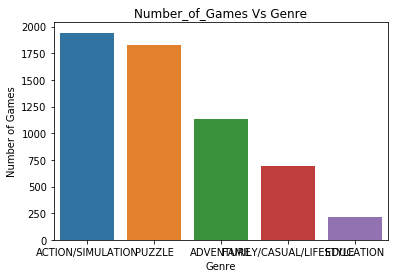

In [71]:
#Plotting the Number of games vs Genre
x_axis = list(appgames_4.Genre_Analysis_Series.value_counts().index)
y_axis = list(appgames_4.Genre_Analysis_Series.value_counts())

plot1_genre = sns.barplot(x = x_axis, y = y_axis)
plot1_genre.set(xlabel = 'Genre',ylabel = 'Number of Games')
plot1_genre.set_title('Number_of_Games Vs Genre')
plt.ioff()

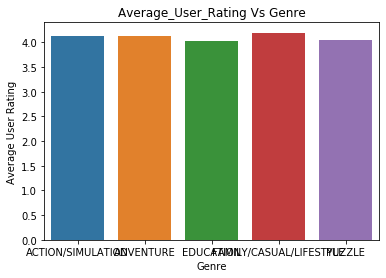

In [72]:
#Plotting Average User Rating Vs Genre

y_axis2 = list(appgames_4.groupby('Genre_Analysis_Series').Average_User_Rating.mean())
x_axis2 = list(appgames_4.groupby('Genre_Analysis_Series').Average_User_Rating.mean().index)

plot2_genre = sns.barplot(x = x_axis2, y = y_axis2)
plot2_genre.set(xlabel = 'Genre',ylabel = 'Average User Rating')
plot2_genre.set_title('Average_User_Rating Vs Genre')
plt.ioff()

In [73]:
list(appgames_4.groupby('Genre_Analysis_Series').Average_User_Rating.mean())

[4.126865671641791,
 4.129416961130742,
 4.022935779816514,
 4.194524495677234,
 4.039156626506024]

In [74]:
appgames_4.Average_User_Rating.unique()

array([4. , 3.5, 3. , 2.5, 2. , 4.5, 1.5, 5. , 1. ])

In [75]:
appgames_4[(appgames_4['Average_User_Rating']==4.0) | (appgames_4['Average_User_Rating']==5.0) |\
           (appgames_4['Average_User_Rating']==4.5)].groupby('Genre_Analysis_Series').Average_User_Rating.count()                                                  

Genre_Analysis_Series
ACTION/SIMULATION          1515
ADVENTURE                   899
EDUCATION                   149
FAMILY/CASUAL/LIFESTYLE     562
PUZZLE                     1321
Name: Average_User_Rating, dtype: int64

In [76]:
appgames_4[(appgames_4['Average_User_Rating']==4.0) | (appgames_4['Average_User_Rating']==5.0) |\
           (appgames_4['Average_User_Rating']==4.5)]

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update,Genre_Analysis_Series
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,3126 days,PUZZLE
24,Boomshine,4.0,637.0,0.99,0,4+,EN,22873088.0,"Games, Puzzle, Entertainment, Strategy",2008-07-10,2017-05-20,NA,Puzzle,NA,Strategy,3236 days,PUZZLE
26,Fieldrunners,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",9+,EN,75041792.0,"Games, Entertainment, Action, Strategy",2008-05-10,2018-11-04,NA,NA,Action,Strategy,3830 days,ACTION/SIMULATION
30,Expert Sudoku,4.0,523.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",9543680.0,"Games, Strategy, Entertainment, Puzzle",2008-10-21,2017-05-30,NA,Strategy,NA,Puzzle,3143 days,PUZZLE
32,Chess Genius,4.0,156.0,5.99,0,4+,"EN, FR, DE, IT, ES",1751040.0,"Games, Strategy, Board, Entertainment",2008-08-11,2016-05-08,NA,Strategy,Board,NA,2827 days,PUZZLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,Zoo Park Idle,4.0,10.0,0.00,0,12+,EN,89412608.0,"Games, Strategy",2019-06-28,2019-10-07,NA,Strategy,NA,NA,101 days,ADVENTURE
16863,Hero Chess: Teamfight Auto,4.5,51.0,0.00,9.99,9+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",198211584.0,"Games, Board, Strategy",2019-07-29,2019-07-29,NA,Board,Strategy,NA,0 days,PUZZLE
16874,Idle Waterpark 3D Fun Aquapark,5.0,201.0,0.00,0,4+,EN,325653504.0,"Games, Entertainment, Simulation, Strategy",2019-02-08,2019-02-08,NA,NA,Simulation,Strategy,0 days,ACTION/SIMULATION
16883,Secret Run 3D - Touch the Spot,4.5,50.0,0.00,0,4+,EN,117440512.0,"Games, Racing, Strategy, Entertainment",2019-01-08,2019-01-08,NA,Racing,Strategy,NA,0 days,ACTION/SIMULATION


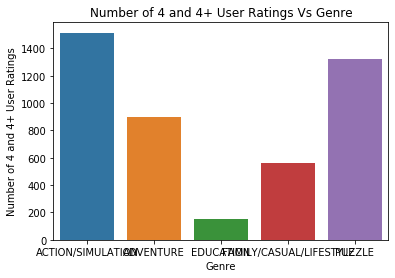

In [77]:
#Plotting the number of 4+ rating games in each genre 

y_axis3 = list(appgames_4[(appgames_4['Average_User_Rating']==4.0) | (appgames_4['Average_User_Rating']==5.0) |\
           (appgames_4['Average_User_Rating']==4.5)].groupby('Genre_Analysis_Series').Average_User_Rating.count())
x_axis3 = list(appgames_4[(appgames_4['Average_User_Rating']==4.0) | (appgames_4['Average_User_Rating']==5.0) |\
           (appgames_4['Average_User_Rating']==4.5)].groupby('Genre_Analysis_Series').Average_User_Rating.count().index)

plot3_genre = sns.barplot(x = x_axis3, y = y_axis3)
plot3_genre.set(xlabel = 'Genre',ylabel = 'Number of 4 and 4+ User Ratings')
plot3_genre.set_title('Number of 4 and 4+ User Ratings Vs Genre')
plt.ioff()

#### INFERENCE

1. There are a lot of Action/Simulation and Puzzle Genre games in the AppStore .This proves that these two genres    are currently quite competitive and are attracting a lot of market.

2. The Average Rating of all the genres is above 4.However that does not mean all the Genres are performing          equally well as this result also depends on the number of games of the different genres available in the store.

3. The third plot of the Genre section provides the most important information. From this we see that                Action/Simulation genre provides the highest number of 4+ User rating games followed by Puzzle games.
   Hence these are the best combination of genres one would want to build an app on.
   
4. The worst performer in the case of 4+ user ratings is Education .There might be various factors that could lead 
   to this.One of the factor might be that online education faces the challenge of proper presentation.
   In many cases if the app is not very good at its presentation it will not be able to get a good user rating.

# Plots of Different Properties And Inferences 

This Section will deal with variation of different properties with respect to one another and provide inferences after each plot .A summary of Inferences is given at the end.

## Price and In-App Purchases

In this of the code will analyse how the in-app purchases ,price and number of games . 

In [78]:
appgames_4.head(100)

,Name,Average_User_Rating,User_Rating_Count,Price,In-app_Purchases,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update,Genre_Analysis_Series
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,3126 days,PUZZLE
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,NA,Strategy,Board,NA,3478 days,PUZZLE
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,NA,Board,Strategy,NA,3105 days,PUZZLE
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,NA,Strategy,Puzzle,NA,3233 days,PUZZLE
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,NA,Strategy,Board,Education,3656 days,EDUCATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,SmartGo Player,4.0,569.0,2.99,0,4+,"EN, FR, DE, JA, KO, RU, ZH, ES, ZH",23805952.0,"Games, Entertainment, Board, Strategy",2009-06-05,2018-04-05,NA,NA,Board,Strategy,3226 days,PUZZLE
104,Big 2 Classic,3.5,127.0,2.99,0,4+,"EN, ZH, ZH",3684352.0,"Games, Strategy, Card, Entertainment",2009-07-05,2017-10-14,NA,Strategy,Card,NA,3023 days,PUZZLE
105,"""Sally's Spa Lite""",4.0,193923.0,0.00,0,4+,"EN, FR, DE, IT, ES",233482240.0,"Games, Action, Entertainment, Strategy",2009-05-28,2017-11-09,NA,Action,NA,Strategy,3087 days,ACTION/SIMULATION
106,TowerMadness,4.0,42389.0,2.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99...",9+,"EN, DE",56048640.0,"Games, Strategy, Puzzle",2009-05-24,2018-05-03,NA,Strategy,Puzzle,NA,3266 days,PUZZLE


In [79]:
#The In-app_Purchases column does not contain any null values
appgames_4['In-app_Purchases'].isnull().value_counts()

False    5813
Name: In-app_Purchases, dtype: int64

In [80]:
#The Price column mdoes not contain any NULL values
appgames_4['Price'].isnull().value_counts()

False    5813
Name: Price, dtype: int64

In [81]:
#Checking the datatypes of the columns
appgames_4.dtypes

Name                                     object
Average_User_Rating                     float64
User_Rating_Count                       float64
Price                                   float64
In-app_Purchases                         object
Age_Rating                               object
Languages                                object
Size                                    float64
Genres                                   object
Original_Release_Date            datetime64[ns]
Current_Version_Release_Date     datetime64[ns]
Genre_1                                  object
Genre_2                                  object
Genre_3                                  object
Genre_4                                  object
Interval_of_Update              timedelta64[ns]
Genre_Analysis_Series                    object
dtype: object

In [82]:
#In app purchases contain
appgames_4['In-app_Purchases'].str.contains(',').value_counts()

True     3072
False     693
Name: In-app_Purchases, dtype: int64

In [83]:
#Changing the in-app-purchases name to IAP
col_edit = ['Name', 'Average_User_Rating', 'User_Rating_Count', 'Price',
       'IAP', 'Age_Rating', 'Languages', 'Size', 'Genres',
       'Original_Release_Date', 'Current_Version_Release_Date', 'Genre_1',
       'Genre_2', 'Genre_3', 'Genre_4', 'Interval_of_Update',
       'Genre_Analysis_Series']
appgames_4.columns = col_edit
appgames_4.columns

Index(['Name', 'Average_User_Rating', 'User_Rating_Count', 'Price', 'IAP',
       'Age_Rating', 'Languages', 'Size', 'Genres', 'Original_Release_Date',
       'Current_Version_Release_Date', 'Genre_1', 'Genre_2', 'Genre_3',
       'Genre_4', 'Interval_of_Update', 'Genre_Analysis_Series'],
      dtype='object')

In [84]:
list_series = appgames_4.IAP.str.split(pat = ',', n = -1, expand = False)
list_series[3000]

nan

In [85]:
#Replacing the ',' in the in-app-purchases to blank space and taking the mean in the rows that contain multiple 
#values
appgames_4['IAP'] = appgames_4['IAP'].str.replace(',','')
appgames_4['IAP'].fillna(value = 0, inplace = True)
appgames_4.head(100)
series = appgames_4.loc[appgames_4['IAP']!=0].IAP.str.split(pat = ' ',expand = False) 
for i in series.index:
    for x in range(len(series[i])):
        series[i][x] = float(series[i][x])
    series[i] = st.mean(series[i])
    appgames_4.IAP[i] = series[i]


/home/amitanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [86]:
series

5           1.99
15          0.99
16          0.99
18       2.13286
19          0.99
          ...   
16647       8.09
16694       5.09
16718       2.99
16729      23.99
16863       9.99
Name: IAP, Length: 3765, dtype: object

In [87]:
for j in series.index:
    print(appgames_4.IAP[j])

1.99
0.99
0.99
2.132857142857143
0.99
0.99
1.49
1.99
1.99
1.391
1.7910000000000001
2.79
0.99
1.24
26.79
0.99
1.3900000000000001
0.99
1.69
2.4344444444444444
0.99
5.89
14.989999999999998
0.99
23.10111111111111
0.99
3.3233333333333333
2.99
1.99
2.09
36.99
0.99
0.99
0.99
0.99
3.6566666666666667
34.49
0.99
0.99
1.99
4.79
2.49
0.99
7.99
0.99
0.99
0.99
2.6566666666666667
2.99
0.99
0.99
3.5900000000000003
3.9185714285714286
79.65666666666667
79.65666666666667
0.99
0.99
0.99
7.49
27.490000000000002
4.99
2.6566666666666667
0.99
0.99
0.99
0.99
3.99
0.99
3.5900000000000003
0.99
14.59
0.99
2.99
1.99
2.4344444444444444
0.99
3.6566666666666667
1.1328571428571428
7.59
1.49
1.99
7.29
2.6566666666666667
26.115
1.99
0.99
1.6566666666666667
1.19
2.49
1.59
18.39
1.24
2.99
3.79
31.656666666666666
3.24
3.3233333333333333
6.212222222222222
0.99
0.99
2.99
7.59
0.99
6.49
3.365
4.79
2.59
0.495
2.99
8.19
2.09
0.99
0.99
3.24
0.99
3.24
0.99
28.156666666666666
1.19
0.99
4.49
3.99
0.99
0.9928571428571429
1.69
28.156

2.49
20.49
3.29
26.49
27.09
36.99
3.3233333333333333
1.99
21.09
9.29
7.1899999999999995
1.99
26.704285714285714
21.59
27.29
6.323333333333333
4.99
12.632857142857143
8.69
1.99
1.49
0.99
1.24
1.99
1.99
2.49
0.99
4.29
8.99
20.99
3.4344444444444444
3.8471428571428574
4.390000000000001
1.99
28.823333333333334
24.99
21.689999999999998
2.6566666666666667
1.99
7.59
1.99
7.171818181818182
34.089999999999996
2.74
2.74
5.99
1.99
35.39
5.156666666666667
13.99
19.275714285714283
6.09
6.09
13.39
13.451538461538462
4.49
1.99
3.49
17.740000000000002
5.323333333333333
27.59
5.19
11.99
11.99
3.49
1.99
2.29
24.09
1.9900000000000002
1.99
2.4344444444444444
0.99
0.99
0.99
21.49
42.99
2.69
0.99
8.99
8.99
19.19
18.29
9.89
6.69
2.99
17.49
0.99
2.99
3.79
3.1566666666666667
1.99
27.275714285714287
30.99
3.6900000000000004
6.99
1.19
23.59
9.49
17.19
2.4344444444444444
7.79
4.99
4.99
4.99
13.865
1.99
0.99
3.99
5.1899999999999995
1.69
4.323333333333333
11.74
11.49
24.990000000000002
5.890000000000001
0.99
35.39
3

15.790000000000001
7.99
8.08090909090909
8.69
1.99
0.99
5.99
8.39
11.49
26.79
7.49
1.3233333333333333
5.79
7.29
2.6566666666666667
30.99
7.79
1.99
5.323333333333333
4.561428571428571
2.99
1.99
1.99
1.39
24.115
27.847142857142856
4.49
28.49
2.99
22.49
4.656666666666667
2.49
4.99
5.49
5.79
10.767777777777777
6.69
1.115
20.990000000000002
4.59
25.275714285714287
6.49
15.59
2.8233333333333333
2.99
5.79
3.99
6.89
4.49
3.99
22.10111111111111
22.10111111111111
24.99
24.156666666666666
1.99
27.99
5.04
1.99
15.190000000000001
13.656666666666666
21.59
8.656666666666666
14.389999999999999
2.49
8.29
26.99
25.99
1.99
1.99
33.79
17.813529411764705
25.275714285714287
1.9900000000000002
27.41857142857143
4.19
0.99
3.74
0.99
0.99
12.389999999999999
25.74
27.99
30.99
6.99
5.19
14.09
2.5455555555555556
8.39
2.99
11.39
34.19
32.99
6.323333333333333
0.99
4.99
11.69
6.739999999999999
0.99
2.79
1.29
0.99
4.99
9.99
7.489999999999999
10.19
27.275714285714287
4.49
6.89
9.59
51.489999999999995
15.99
20.29
22.189

In [88]:
appgames_4.head(100)

,Name,Average_User_Rating,User_Rating_Count,Price,IAP,Age_Rating,Languages,Size,Genres,Original_Release_Date,Current_Version_Release_Date,Genre_1,Genre_2,Genre_3,Genre_4,Interval_of_Update,Genre_Analysis_Series
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,NA,Strategy,Puzzle,NA,3126 days,PUZZLE
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-11-07,2018-05-17,NA,Strategy,Board,NA,3478 days,PUZZLE
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-11-07,2017-05-09,NA,Board,Strategy,NA,3105 days,PUZZLE
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,NA,Strategy,Puzzle,NA,3233 days,PUZZLE
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,NA,Strategy,Board,Education,3656 days,EDUCATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,SmartGo Player,4.0,569.0,2.99,0,4+,"EN, FR, DE, JA, KO, RU, ZH, ES, ZH",23805952.0,"Games, Entertainment, Board, Strategy",2009-06-05,2018-04-05,NA,NA,Board,Strategy,3226 days,PUZZLE
104,Big 2 Classic,3.5,127.0,2.99,0,4+,"EN, ZH, ZH",3684352.0,"Games, Strategy, Card, Entertainment",2009-07-05,2017-10-14,NA,Strategy,Card,NA,3023 days,PUZZLE
105,"""Sally's Spa Lite""",4.0,193923.0,0.00,0,4+,"EN, FR, DE, IT, ES",233482240.0,"Games, Action, Entertainment, Strategy",2009-05-28,2017-11-09,NA,Action,NA,Strategy,3087 days,ACTION/SIMULATION
106,TowerMadness,4.0,42389.0,2.99,2.43444,9+,"EN, DE",56048640.0,"Games, Strategy, Puzzle",2009-05-24,2018-05-03,NA,Strategy,Puzzle,NA,3266 days,PUZZLE


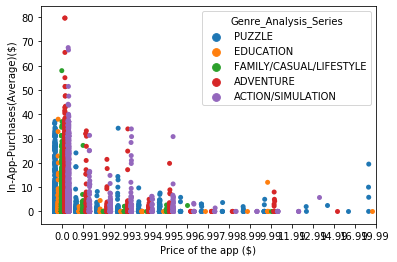

In [89]:
#Plotting in-app-purchases vs price of the app . The colors refer to the genre 

plot1 = sns.stripplot(x=appgames_4.Price, y=appgames_4.IAP, data=appgames_4, hue=appgames_4.Genre_Analysis_Series, dodge=True)
plot1.set(xlabel = 'Price of the app ($)', ylabel = 'In-App-Purchases(Average)($)')
plot1.set(xlim = (-1,15))
plt.ioff()


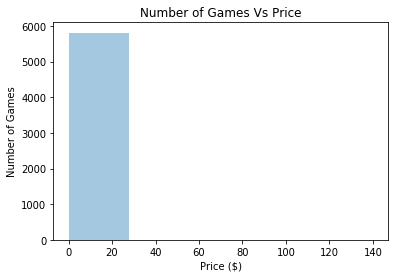

In [90]:
#Plotting Number of games vs price

plot2 = sns.distplot(appgames_4['Price'],kde = None,hist=True,bins=5)
plot2.set(xlabel = 'Price ($)',ylabel = 'Number of Games')
plot2.set_title("Number of Games Vs Price")
plt.ioff()

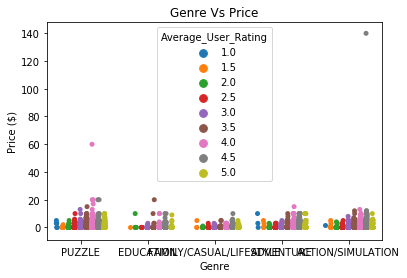

In [91]:
#Plotting genre vs game price along with user rating

plot3 = sns.stripplot(x=appgames_4.Genre_Analysis_Series,y=appgames_4.Price,hue=appgames_4.Average_User_Rating,dodge = 1)
plot3.set(xlabel='Genre',ylabel='Price ($)')
plot3.set_title('Genre Vs Price')
plt.ioff()

#### INFERENCE 

1. As the price of the app goes down the in_app_purchases becomes more costlier.This is natural since the company 
   which made the app will need a source of income.
2. Adventure games with very less price have very high in_app_purchases compared to others. This might be because
   adventure games are very high graphic games and a lot of tools are needed to go to next levels .
3. Compared to others, Education apps have very less in_app_purchases.
4. Most of the apps cost between 0-30 dollar.
5. As the price of the app increases, an appreciable increase in the star-rating can be seen. This mainly happens    because the apps which charge high price, gaurantee very good user experience.  

## Release Date and Update Date Analysis  

In this part we analyse how the user rating count varies with update gap of the app through a scatter plot.
We will also see which genre of games receive more frequent updates.

In [92]:
appgames_4.Interval_of_Update

0       3126 days
1       3478 days
2       3105 days
3       3233 days
4       3656 days
           ...   
16846    132 days
16863      0 days
16874      0 days
16883      0 days
16962      0 days
Name: Interval_of_Update, Length: 5813, dtype: timedelta64[ns]

In [93]:
#df['tdColumn'] = df['tdColumn'].dt.days.astype('int16')
appgames_4['Interval_of_Update'] = appgames_4['Interval_of_Update'].dt.days.astype('int16')

In [94]:
appgames_4.dtypes

Name                                    object
Average_User_Rating                    float64
User_Rating_Count                      float64
Price                                  float64
IAP                                     object
Age_Rating                              object
Languages                               object
Size                                   float64
Genres                                  object
Original_Release_Date           datetime64[ns]
Current_Version_Release_Date    datetime64[ns]
Genre_1                                 object
Genre_2                                 object
Genre_3                                 object
Genre_4                                 object
Interval_of_Update                       int16
Genre_Analysis_Series                   object
dtype: object

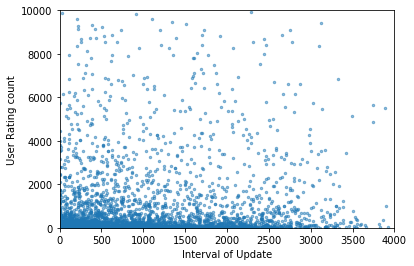

In [95]:
#Scatter plot between number of user rating for an app and number of days gap between release and update dates 

plt.scatter(x=appgames_4.Interval_of_Update,y=appgames_4.User_Rating_Count, alpha =0.5, s =6)
plt.ylim(0,10000)
plt.xlim(0,4000)

plt.xlabel('Interval of Update')
plt.ylabel('User Rating count')
plt.show()

In [96]:
appgames_4.Genre_Analysis_Series.unique()

array(['PUZZLE', 'EDUCATION', 'FAMILY/CASUAL/LIFESTYLE', 'ADVENTURE',
       'ACTION/SIMULATION'], dtype=object)

In [97]:
appgames_4.groupby('Genre_Analysis_Series').Interval_of_Update.mean()

Genre_Analysis_Series
ACTION/SIMULATION           789.061760
ADVENTURE                   739.938163
EDUCATION                  1132.678899
FAMILY/CASUAL/LIFESTYLE     759.304035
PUZZLE                     1150.548740
Name: Interval_of_Update, dtype: float64

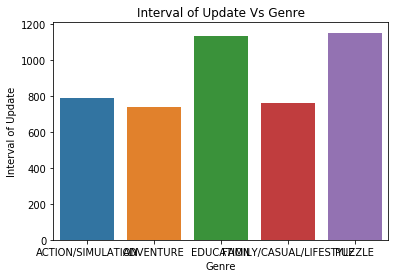

In [98]:
#Plotting Barplot Genre vs mean interval of update 

x = ['ACTION/SIMULATION','ADVENTURE','EDUCATION','FAMILY/CASUAL/LIFESTYLE','PUZZLE']
y = appgames_4.groupby('Genre_Analysis_Series').Interval_of_Update.mean().values

plot5 = sns.barplot(x,y)
plot5.set(xlabel = 'Genre',ylabel = 'Interval of Update')
plot5.set_title('Interval of Update Vs Genre')
plt.ioff()

#### INFERENCE 

1. Recently updated apps get more user rating.This is natural because new update in an app attracts more              customers.Hence the number of people rating the app increases.
2. Action/Simulation, Adventure and Casual genres get more frequent updates.Action and Adventure apps are typical 
   gaming apps and have a lot logistics .Hence they need a lot of updates.

## Game Size Analysis

In this part we will analyse basically four types of plots

1. Game size changes over the year with respect to genres
2. Game size and the user rating the game gets with respect of genres
3. Number of games Vs the Game size
4. Game size Vs user rating irrespective of Genres

In [99]:
#Adding a new column 'Release Year' for the Original Release Date
appgames_4['Release_Year'] = pd.DatetimeIndex(appgames_4['Original_Release_Date']).year
appgames_4.Release_Year

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
16846    2019
16863    2019
16874    2019
16883    2019
16962    2019
Name: Release_Year, Length: 5813, dtype: int64

In [100]:
#Converting the Release Year from int type to string type
appgames_4.Release_Year.astype(str)

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
16846    2019
16863    2019
16874    2019
16883    2019
16962    2019
Name: Release_Year, Length: 5813, dtype: object

In [101]:
appgames_4.Size=appgames_4.Size/1000000

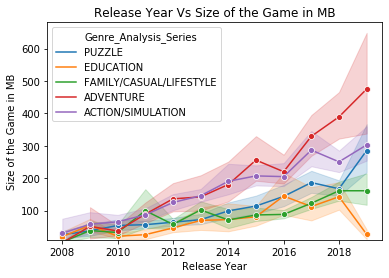

In [102]:
#Plotting the Game size changes over the years with respect to Genres 

plot6 = sns.lineplot(x=appgames_4.Release_Year,y=appgames_4.Size,hue=appgames_4.Genre_Analysis_Series,marker = 'o')
plot6.set(xlabel = 'Release Year',ylabel = 'Size of the Game in MB')
plot6.set(ylim = 10)
plot6.set_title('Release Year Vs Size of the Game in MB')
plt.ioff()

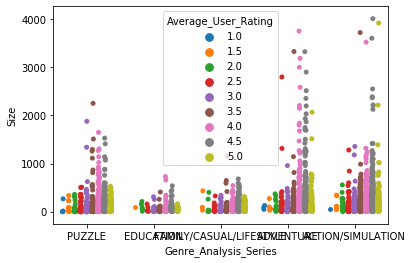

In [103]:
#Plotting the game size vs Genre and the user rating it gets

plot7 = sns.stripplot(x=appgames_4.Genre_Analysis_Series, y=appgames_4.Size,\
                      hue=appgames_4.Average_User_Rating,dodge = True)
plt.ioff()

In [104]:
appgames_4.Size=appgames_4.Size.astype(int)
appgames_4.dtypes

Name                                    object
Average_User_Rating                    float64
User_Rating_Count                      float64
Price                                  float64
IAP                                     object
Age_Rating                              object
Languages                               object
Size                                     int64
Genres                                  object
Original_Release_Date           datetime64[ns]
Current_Version_Release_Date    datetime64[ns]
Genre_1                                 object
Genre_2                                 object
Genre_3                                 object
Genre_4                                 object
Interval_of_Update                       int16
Genre_Analysis_Series                   object
Release_Year                             int64
dtype: object

Text(0.5, 1.0, 'Number of Games Vs Size of Games less than 250 MB')

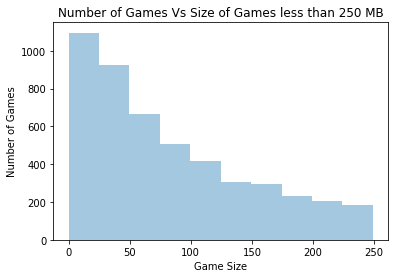

In [105]:
#Plotting Number of games VS game size for two different segments 
#1. From 0 to 250 MB
#2. 250 to 500 MB
#3. 500  MB and above 

below_250 = appgames_4[appgames_4.Size < 250]
btw_250_500 = appgames_4.loc[ (appgames_4.Size>=250) & (appgames_4.Size<500)]
above_500 = appgames_4[appgames_4.Size > 500]

plot8 = sns.distplot(below_250.Size,kde=False,bins=10)
plot8.set(xlabel = 'Game Size' ,ylabel = 'Number of Games')
plot8.set_title('Number of Games Vs Size of Games less than 250 MB')

Text(0.5, 1.0, 'Number of Games Vs Size of Games between 250 MB and 500 MB')

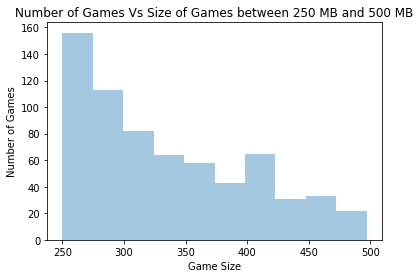

In [106]:
plot9 = sns.distplot(btw_250_500.Size,kde=False,bins=10)
plot9.set(xlabel = 'Game Size' ,ylabel = 'Number of Games')
plot9.set_title('Number of Games Vs Size of Games between 250 MB and 500 MB')

Text(0.5, 1.0, 'Number of Games Vs Size of Games more than 500 MB')

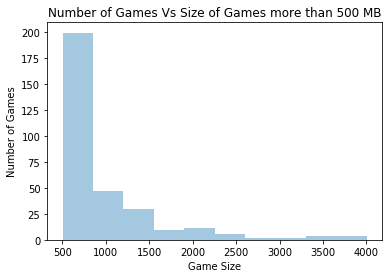

In [107]:
plot10 = sns.distplot(above_500.Size,kde=False,bins=10)
plot10.set(xlabel = 'Game Size' ,ylabel = 'Number of Games')
plot10.set_title('Number of Games Vs Size of Games more than 500 MB')

Text(0.5, 1.0, 'Game Size Vs User Rating for Game size less than 250 MB')

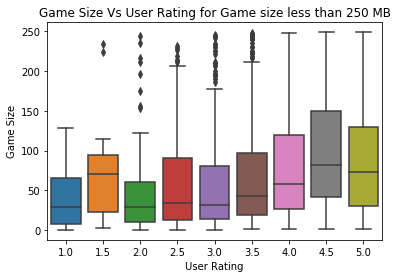

In [108]:
#Plotting Number of games VS game size for two different segments 
#1. From 0 to 250 MB
#2. 250 to 500 MB
#3. 500  MB and above 

plot11 = sns.boxplot(x=below_250.Average_User_Rating,y=below_250.Size,data=below_250)
plot11.set(xlabel='User Rating',ylabel='Game Size')
plot11.set_title('Game Size Vs User Rating for Game size less than 250 MB')


Text(0.5, 1.0, 'Game Size Vs User Rating for Game size between 250 MB and 500 MB')

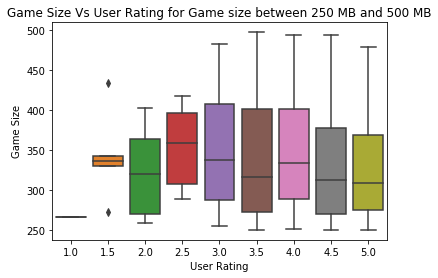

In [109]:
plot12 = sns.boxplot(x=btw_250_500.Average_User_Rating,y=btw_250_500.Size,data=btw_250_500)
plot12.set(xlabel='User Rating',ylabel='Game Size')
plot12.set_title('Game Size Vs User Rating for Game size between 250 MB and 500 MB')

Text(0.5, 1, 'Game Size Vs User Rating for Game size more than 500 MB')

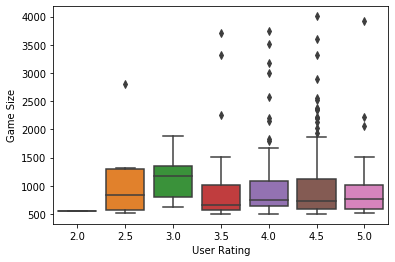

In [110]:
plot13 = sns.boxplot(x=above_500.Average_User_Rating,y=above_500.Size,data=above_500)
plot13.set(xlabel='User Rating',ylabel='Game Size')
plot11.set_title('Game Size Vs User Rating for Game size more than 500 MB')

#### INFERENCE

1. Adventure and Action/Simulation category games have increased drastically in size over the period of 10 years
   from 2008 and 2018
2. Adventure games get rating of 4 ,4.5 in game size ranging upto 2000 MB.This is true for Action/Simulation
   games upto 1500 MB and for Puzzle games upto 1000 MB.But a 5 star rating mostly occurs for games of size within
   1000 MB for three of them.
3. For all the other games a good user rating is obtained for size within approximately 700 MB.
4. There are huge number of games below 250 MB size with peak number of games between 0 to 100 MB.
5. Number of games of size above 250 MB are quite less.
6. For games below 250 MB, very good rating occurs if the game is above 50 MB.
7. For games between 250 MB and 500 MB, The game should be atleast be less than 400 MB to expect a good rating.
   However, not much can be told in this case.
8. Almost all games above 500 MB have rating greater than 2.5.

## Age Rating Analysis 

It is a small Analysis regarding the number of games in a certain Age group

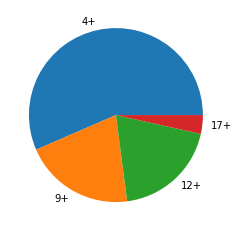

In [111]:
Age = list(appgames_4.Age_Rating.value_counts().index)
Age_Frequency = list(appgames_4.Age_Rating.value_counts().values)

plt.pie(Age_Frequency,labels = Age)
plt.show()

#### INFERENCE 

1. Most of the games have 4+ user rating.Kids form a big customer pool for games and hence 4+ age games are
   high in the store.

# INFERENCE SUMMARY 

1. There are a lot of Action/Simulation and Puzzle Genre games in the AppStore .This proves that these two genres    are currently quite competitive and are attracting a lot of market

2. The Average Rating of all the genres is above 4.However that does not mean all the Genres are performing          equally well as this result also depends on the number of games of the different genres available in the store.

3. The third plot of the Genre section provides the most important information. From this we see that                Action/Simulation genre provides the highest number of 4+ User rating games followed by Puzzle games.
   Hence these are the best combination of genres one would want to build an app on.
   
4. The worst performer in the case of 4+ user ratings is Education .There might be various factors that could lead 
   to this.One of the factor might be that online education faces the challenge of proper presentation.
   In many cases if the app is not very good at its presentation it will not be able to get a good user rating.
   
5. As the price of the app goes down the in_app_purchases becomes more costlier.This is natural since the company 
   which made the app will need a source of income.
   
6. Adventure games with very less price have very high in_app_purchases compared to others. This might be because
   adventure games are very high graphic games and a lot of tools are needed to go to next levels .
   
7. Compared to others, Education apps have very less in_app_purchases.

8. Most of the apps cost between 0-30 dollar.

9. As the price of the app increases, an appreciable increase in the star-rating can be seen. This mainly happens    because the apps which charge high price, gaurantee very good user experience.  

10. Recently updated apps get more user rating.This is natural because new update in an app attracts more c c          customers.Hence the number of people rating the app increases.

11. Action/Simulation, Adventure and Casual genres get more frequent updates.Action and Adventure apps are typical 
    gaming apps and have a lot logistics .Hence they need a lot of updates.
  
12. Adventure and Action/Simulation category games have increased drastically in size over the period of 10 years
    from 2008 and 2018.
   
13. Adventure games get rating of 4 ,4.5 in game size ranging upto 2000 MB.This is true for Action/Simulation
    games upto 1500 MB and for Puzzle games upto 1000 MB.But a 5 star rating mostly occurs for games of size           within 1000 MB for three of them.
   
14. For all the other games a good user rating is obtained for size within approximately 700 MB.

15. There are huge number of games below 250 MB size with peak number of games between 0 to 100 MB.

16. Number of games of size above 250 MB are quite less.

17. For games below 250 MB, very good rating occurs if the game is above 50 MB.

18. For games between 250 MB and 500 MB, The game should be atleast be less than 400 MB to expect a good rating.
    However, not much can be told in this case.
   
19. Almost all games above 500 MB have rating greater than 2.5.

20. Most of the games have 4+ user rating.Kids form a big customer pool for games and hence 4+ age games are
    high in the store.